# Eigen Vector & Eigen Value
* Ax = lambda x
    * 행렬 A를 곱해도, 그 방향은 안변하고 길이만 바뀌게 되는 벡터 x: Eigen Vector, 그 비율 lambda: Eigen Value
    * Eigen vector 들끼리 만드는 space: Eigen Space
    * 참고 [Link][https://rfriend.tistory.com/181]

* Ax - lambda x = 0
* (A-lambda I) x = 0

# PCA (Principal Component Analysis)
* Column Reduction
* Let's Drop 'least important' variable --> 'Maximum variance'

## How to PCA?
* Let independent variables X, dependent Y
* Subtract the mean of that column from each entry (To ensure Zero mean of each column)
* Decisde whether or not to standardize.
    + If the importance of features is independent of the variacne of the features, then divide each observation in a column by that column's standard deviation. (To ensure zero standard deviation of each column)
    + 이 단계까지 마치면 zero mean, 1 std 를 중심으로 한 standardized matrix Z 를 얻을 수 있겠지.
* Get Z and Z_transpose, (Z^T)Z = covariance matrix of Z
    + 공분산 행렬: x축 방향으로, y축 방향으로, 양방향으로 '퍼진 정도'를 표현하는 행렬. 어차피 퍼진 정도를 mapping 하는 거니까.
    + i방향, j방향끼리 서로 곱해주면서, 각자 방향으로 얼마나 퍼져있는지 표현
* Get eigen vectors and corresponding eigenvaclues of (Z^T)Z
    + (Z^T)Z into PDP^-1, D's elements lambdas will be the eigen values, which corresponds to columns of P.
    + "각 방향으로 얼마나 퍼져있는지" 를 "어느 방향으로 얼마나 퍼져있는지"로 바꿔주는 Eigen vector 구하기 과정
* Order P (columns of eigen vectors) as decreasing order of D (columns of eigen values) to P*
    + 가장 큰 Eigen value 를 가지는 Eigen vector를 찾기 위해 순서대로 정렬
    + '공분산행렬의 가장 큰 고유값과 고유벡터' 부터, 순서대로 정렬 가능
* Z_star = ZP_star
    + Eigen vector의 중요도 순서대로 재정렬한 Z* matrix 취득
    + 새로운 Z의 각 벡터별 분산 = 그에 해당하는 고유값 (P가 고유 벡터니까)
    + 공분산행렬 (ZTZ)의 고유값 전체 합 = 원데이터 Z의 분산

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
path = '3dSpatialNetwork.csv'
df = pd.read_csv(path)

In [7]:
df.head()

,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


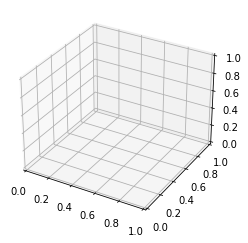

In [8]:
# 3D Visualization
fig = plt.figure()
ax = plt.axes(projection = '3d')

xdata = df['LONGITUDE'][:1000]
ydata = df['LATITUDE'][:1000]
zdata = df['ALTITUDE'][:1000]
#ax.scatter3D(xdata, ydata, zdata, c = zdata, cmap = 'Greens')
#ax.set_xlabel('LONGITUDE')
#ax.set_ylabel('LATITUDE')
#ax.set_zlabel('ALTITUDE')

In [9]:
#Create Z
X = df[['LONGITUDE', 'LATITUDE', 'ALTITUDE']]
demean_X = pd.concat([v - v.mean() for k, v in X.iteritems()], axis = 1)
Z = pd.concat([v / v.std() for k, v in demean_X.iteritems()], axis = 1)
print(Z)


        LONGITUDE  LATITUDE  ALTITUDE
0       -0.608892 -1.184481 -0.275681
1       -0.608350 -1.185162 -0.245492
2       -0.607776 -1.185625 -0.220318
3       -0.607366 -1.185832 -0.209794
4       -0.606972 -1.185826 -0.202086
...           ...       ...       ...
434869   0.326203  1.436812 -0.110182
434870   0.324955  1.435916 -0.086181
434871   0.323860  1.435418 -0.131715
434872   0.337360  1.423800  0.098916
434873   0.337317  1.425013  0.131587

[434874 rows x 3 columns]


In [10]:
#Creat covariance matrix of Z
Z_T = Z.T
arr_Z = Z.to_numpy()
arr_Z_T = Z_T.to_numpy()
Cov_Z = np.cov(arr_Z_T)
print(Cov_Z)


[[ 1.          0.56685465  0.04232349]
 [ 0.56685465  1.         -0.10538305]
 [ 0.04232349 -0.10538305  1.        ]]


In [11]:
#Get Eigen vectors and eigen values
eigen_val, eigen_vec = np.linalg.eig(Cov_Z)
print('Eigen values: ', eigen_val)
print('Eigen Vectors: \n', eigen_vec)

#Sort
ascending = np.argsort(eigen_val)[::-1]
print('\n---------------------\n')
eigen_val = eigen_val[ascending]
eigen_vec = eigen_vec[:, ascending]

print('Sorted Eigen values: ', eigen_val)
print('Sorted Eigen Vectors: \n', eigen_vec)

Eigen values:  [0.41446028 1.57039999 1.01513973]
Eigen Vectors: 
 [[ 0.69122153 -0.69971655  0.18058115]
 [-0.70085779 -0.71001054 -0.06843529]
 [-0.17609982  0.07925776  0.98117637]]

---------------------

Sorted Eigen values:  [1.57039999 1.01513973 0.41446028]
Sorted Eigen Vectors: 
 [[-0.69971655  0.18058115  0.69122153]
 [-0.71001054 -0.06843529 -0.70085779]
 [ 0.07925776  0.98117637 -0.17609982]]


In [12]:
#project Data
z1 = np.sum([eigen_vec[:, 0][i]*arr_Z[:,i] for i in range(3)], axis = 0)
z2 = np.sum([eigen_vec[:, 1][i]*arr_Z[:,i] for i in range(3)], axis = 0)
z3 = np.sum([eigen_vec[:, 2][i]*arr_Z[:,i] for i in range(3)], axis = 0)
pca = np.vstack([z1, z2, z3]).T


In [13]:
# Extract 2 dimension
pca_2 = pca[:, :2]
print(pca_2[:5])

[[ 1.24519565 -0.2993862 ]
 [ 1.24769309 -0.2696205 ]
 [ 1.24961537 -0.24478471]
 [ 1.25030964 -0.23437088]
 [ 1.25063998 -0.22673708]]


In [14]:
#Verify with sklearn module
from sklearn.decomposition import PCA

sk_pca = PCA(n_components = 2)
sk_Z = sk_pca.fit_transform(arr_Z)
#Z2 = sk_Z.inverse_transform(sk_Z)

print(sk_Z)

[[ 1.24519565 -0.2993862 ]
 [ 1.24769309 -0.2696205 ]
 [ 1.24961537 -0.24478471]
 ...
 [-1.25621195 -0.1689856 ]
 [-1.23913014  0.06053641]
 [-1.23737094  0.0925016 ]]


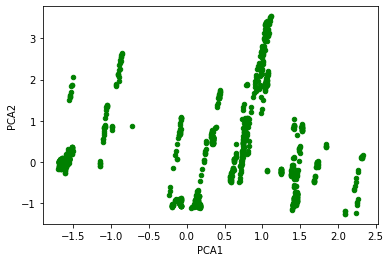

In [15]:
# Plot 2D graph

pca_df = pd.DataFrame(pca_2[:1000], columns = ['PCA1', 'PCA2'])
ax2 = pca_df.plot.scatter(x = 'PCA1', y = 'PCA2', c = 'Green')